In [ ]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentials = json.load(open("kaggle.json"))

In [ ]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [00:24<00:00, 78.8MB/s]
100% 2.04G/2.04G [00:24<00:00, 89.7MB/s]


In [ ]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
with ZipFile("plantvillage-dataset.zip", "r") as zip_ref :
  zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['segmented', 'grayscale', 'color']
38
['Squash___Powdery_mildew', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Tomato_mosaic_virus', 'Grape___Esca_(Black_Measles)', 'Strawberry___Leaf_scorch']
38
['Squash___Powdery_mildew', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Tomato_mosaic_virus', 'Grape___Esca_(Black_Measles)', 'Strawberry___Leaf_scorch']
38
['Squash___Powdery_mildew', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Tomato_mosaic_virus', 'Grape___Esca_(Black_Measles)', 'Strawberry___Leaf_scorch']


In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['ca0f32cb-25b3-4dcc-887f-fa4753c25ed5___Mt.N.V_HL 8998.JPG', 'b7b4fb14-c350-4c88-8a2c-2e35c239af6a___Mt.N.V_HL 9051.JPG', 'edaa5185-4c46-42f4-98c9-cb17830c6fcf___Mt.N.V_HL 8977.JPG', '811f5365-f5a3-4659-8302-009fb5275541___Mt.N.V_HL 8946.JPG', '32bba022-49d8-41ad-99e2-89af85eac71a___Mt.N.V_HL 6055.JPG']


In [ ]:
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


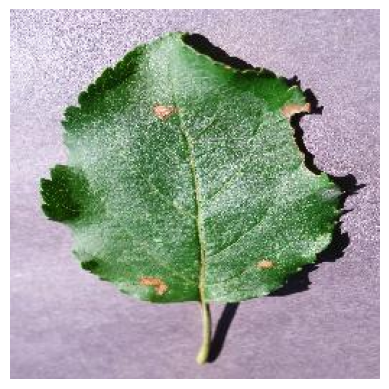

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Black_rot/0199a733-6d3f-4e66-a903-2d1d34457871___JR_FrgE.S 3079.JPG'
img = mpimg.imread(image_path)
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
img_size = 224
batch_size = 32

In [ ]:
data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [ ]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size,img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size,img_size),
    batch_size = batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 10849 images belonging to 38 classes.


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape =(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 5,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size
)

Epoch 1/5
1358/1358 [==============================] - 113s 78ms/step - loss: 0.9656 - accuracy: 0.7362 - val_loss: 0.4902 - val_accuracy: 0.8391
Epoch 2/5
1358/1358 [==============================] - 107s 79ms/step - loss: 0.2850 - accuracy: 0.9100 - val_loss: 0.4473 - val_accuracy: 0.8618
Epoch 3/5
1358/1358 [==============================] - 105s 77ms/step - loss: 0.1400 - accuracy: 0.9534 - val_loss: 0.4833 - val_accuracy: 0.8717
Epoch 4/5
1358/1358 [==============================] - 104s 76ms/step - loss: 0.0832 - accuracy: 0.9724 - val_loss: 0.5111 - val_accuracy: 0.8761
Epoch 5/5
1358/1358 [==============================] - 104s 77ms/step - loss: 0.0672 - accuracy: 0.9783 - val_loss: 0.5983 - val_accuracy: 0.8785


In [ ]:
print("Evaluating Model........")
val_loss, val_accuracy = model.evaluate(validation_generator, steps = validation_generator.samples // batch_size)
print(f"Validation Accuracy : {val_accuracy * 100:.2f}%")

Evaluating Model........
339/339 [==============================] - 19s 55ms/step - loss: 0.5964 - accuracy: 0.8786
Validation Accuracy : 87.86%


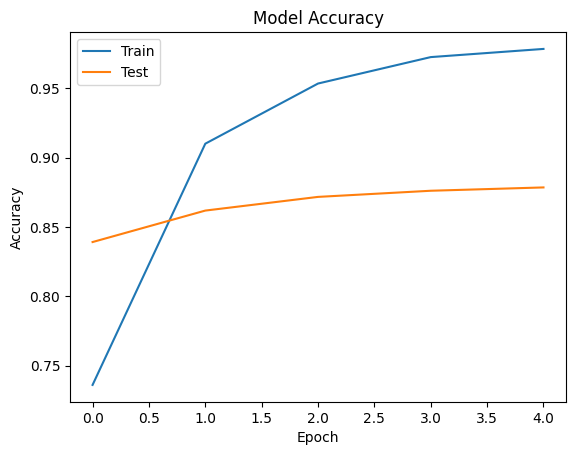

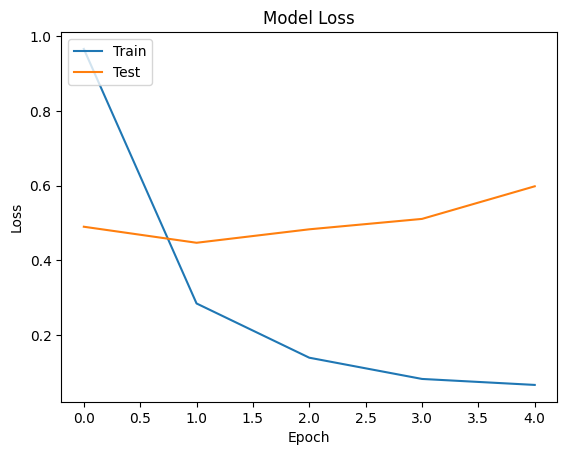

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [ ]:
def load_and_preprocess_image(image_path,target_size =(224,224)) :
  img = Image.open(image_path)
  img = img.resize(target_size)
  img_array = np.array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = img_array.astype('float32')
  return img_array

def predict_image_class(model, image_path, class_indices):
  preprocessed_img = load_and_preprocess_image(image_path)
  predictions = model.predict(preprocessed_img)
  predicted_class_index = np.argmax(predictions, axis=1)[0]
  predicted_class_name = class_indices[predicted_class_index]
  return predicted_class_name

In [ ]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
image_path = '/content/plantvillage dataset/color/Cherry_(including_sour)___Powdery_mildew/012b55cf-de7a-483a-9118-0fd8ff012185___FREC_Pwd.M 0423.JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)

print("Predicted class name :", predicted_class_name)

1/1 [==============================] - 0s 276ms/step
Predicted class name : Strawberry___healthy


In [ ]:
model.save('plants_disease_prediction.tflite')